In [218]:
import numpy as np
import itertools 
import ezc3d
import matplotlib.pyplot as plt
from pathlib import Path
from math import sqrt
from tqdm import tqdm

# Wyświetlenie surowych danych EMG z pliku C3D

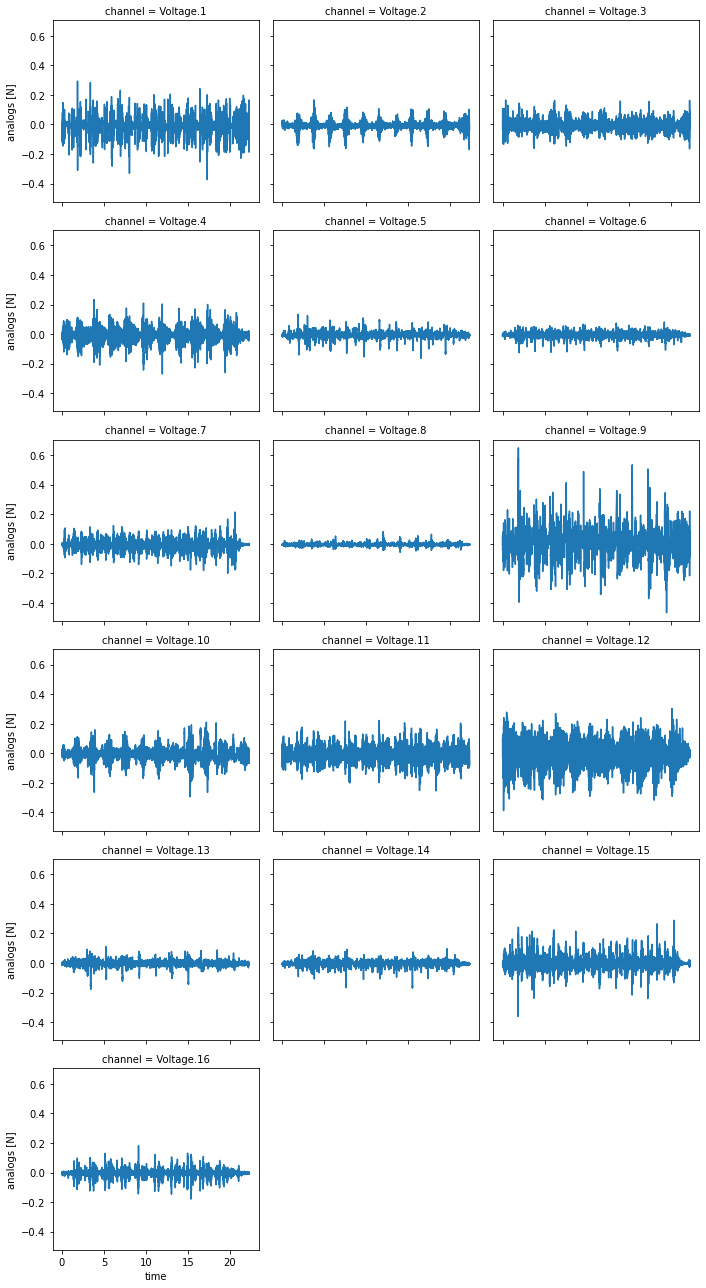

In [219]:
from pyomeca import Analogs

data_path = r"C:\Users\gmultimedia.PJATK8\Desktop\PJATK_K\2020-08-10-B0450-S01-E01-T02.c3d"
muscles = ["Voltage.1","Voltage.2","Voltage.3","Voltage.4","Voltage.5","Voltage.6","Voltage.7","Voltage.8","Voltage.9","Voltage.10","Voltage.11","Voltage.12","Voltage.13","Voltage.14","Voltage.15","Voltage.16"]
muscles_names = ["Czworoboczny grzbietu L","Trójgłowy ramienia L", "Dwugłowy ramienia L", "Prostownik nadgarstka L","Skośny brzucha L", "Pośladkowy średni L","Czworogłowy uda L", "Brzuchaty łydki L","Czworoboczny grzbietu P","Trójgłowy ramienia P", "Dwugłowy ramienia P", "Prostownik nadgarstka P","Skośny brzucha P", "Pośladkowy średni P","Czworogłowy uda P", "Brzuchaty łydki P"]


emg = Analogs.from_c3d(data_path, usecols=muscles)
emg.plot(x="time", col="channel", col_wrap=3)

# Obróbka danych EMG

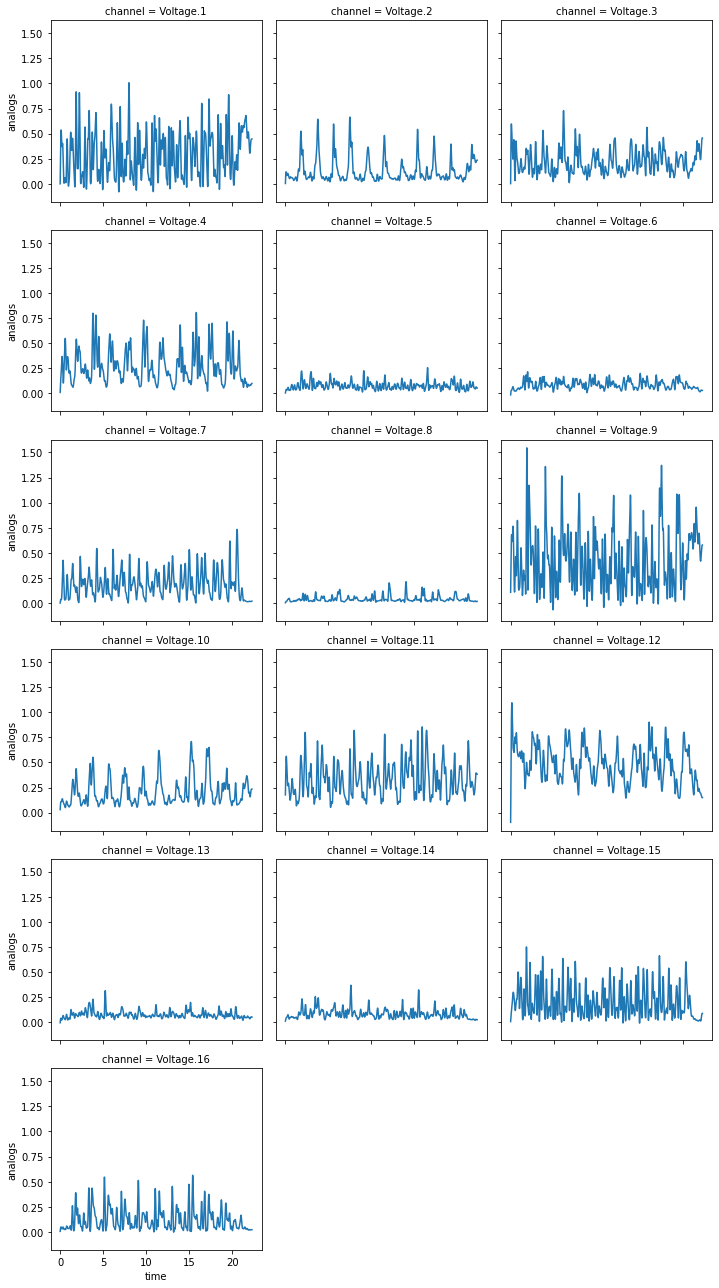

In [220]:
emg_processed = (
    emg.meca.band_pass(order=2, cutoff=[10, 425])
    .meca.center()
    .meca.abs()
    .meca.low_pass(order=4, cutoff=5, freq=emg.rate)
    .meca.normalize(8)
)

emg_processed.plot(x="time", col="channel", col_wrap=3)

# Wyświetlenie danych z nazwami mięśni

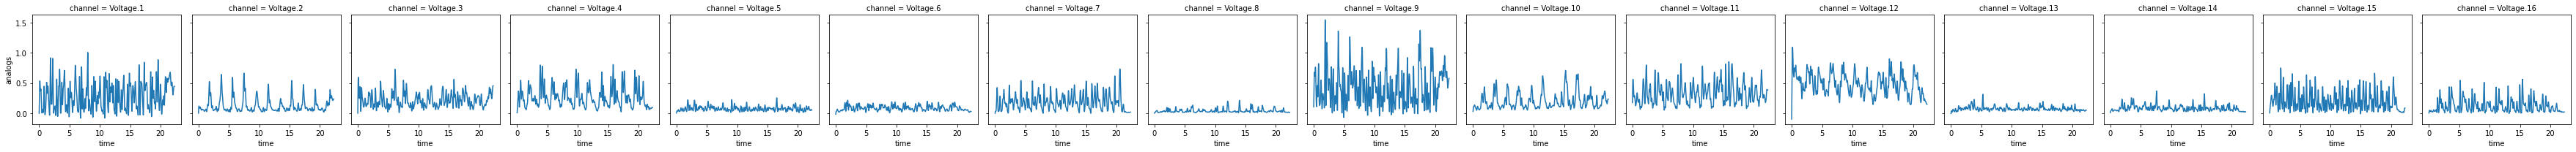

In [221]:
emg_processed.plot(col="channel")

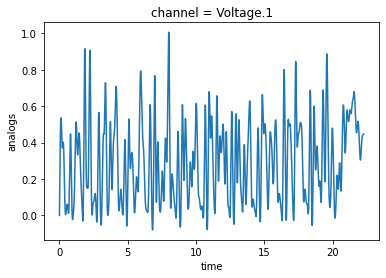

In [222]:
emg_processed[0].plot()

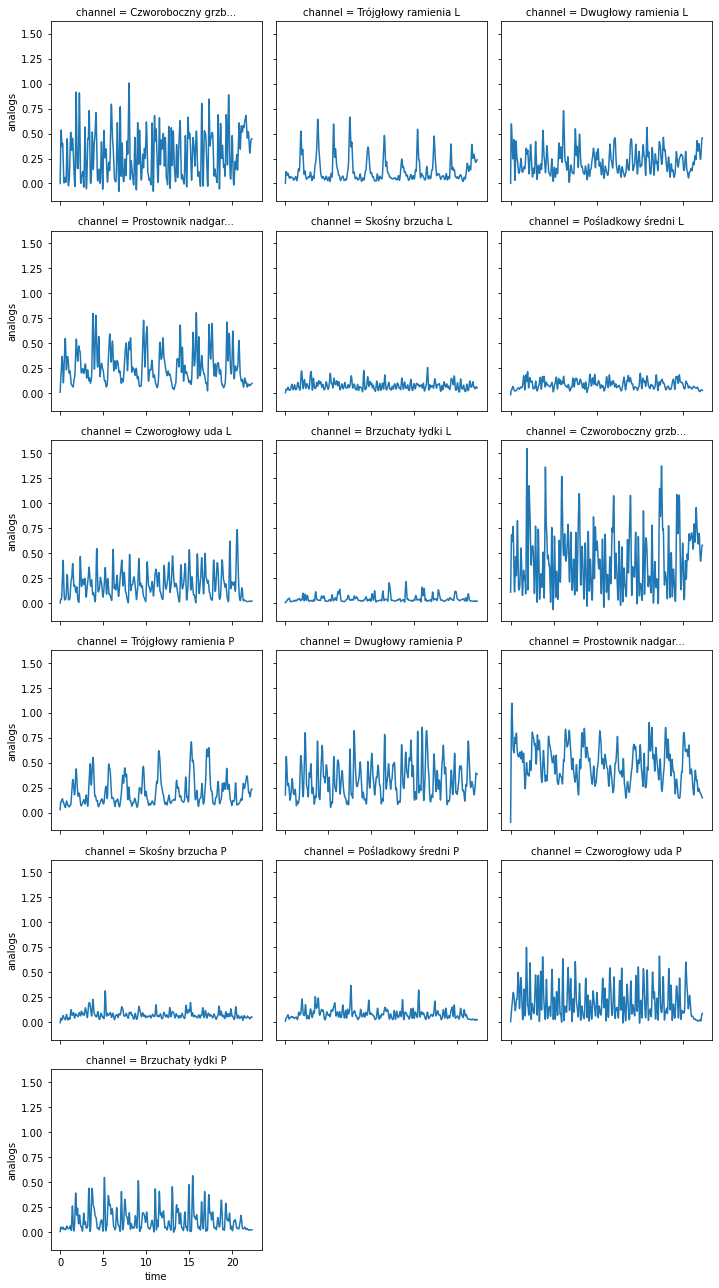

In [223]:
emg_processed.indexes
emg_processed['channel'] = muscles_names
emg_processed.plot(x="time", col="channel", col_wrap=3)

In [224]:
from scipy import stats

In [225]:
emg_2 = stats.zscore(emg_processed[0])

# Wykresy wczytywane pojedyńczo

KeyboardInterrupt: 

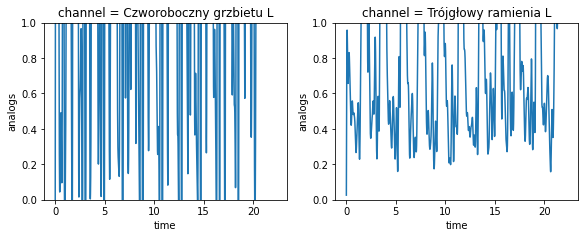

In [263]:
from matplotlib.pyplot import subplots
from matplotlib.pyplot import figure
import matplotlib.pyplot as plt

from sklearn import preprocessing
import numpy as np

from matplotlib import scale as mscale



muscles = [["Voltage.1"],["Voltage.2"],["Voltage.3"],["Voltage.4"],["Voltage.5"],["Voltage.6"],["Voltage.7"],["Voltage.8"],["Voltage.9"],["Voltage.10"],["Voltage.11"],["Voltage.12"],["Voltage.13"],["Voltage.14"],["Voltage.15"],["Voltage.16"]]
muscles_names = [["Czworoboczny grzbietu L"],["Trójgłowy ramienia L"], ["Dwugłowy ramienia L"], ["Prostownik nadgarstka L"],["Skośny brzucha L"], ["Pośladkowy średni L"],["Czworogłowy uda L"], ["Brzuchaty łydki L"],["Czworoboczny grzbietu P"],["Trójgłowy ramienia P"], ["Dwugłowy ramienia P"], ["Prostownik nadgarstka P"],["Skośny brzucha P"], ["Pośladkowy średni P"],["Czworogłowy uda P"], ["Brzuchaty łydki P"]]



#print(muscles[0])
emg_list=[]

plt.figure(figsize=(20,15))

for i in range(0,16): 
    emg_list.append(Analogs.from_c3d(data_path, usecols=muscles[i]))
    
    emg_p = (
    emg_list[i].meca.band_pass(order=2, cutoff=[10, 425])
    .meca.center()
    .meca.abs()
    .meca.low_pass(order=4, cutoff=5, freq=emg.rate)
    .meca.normalize(1)
    )
    
    #print(emg_p.indexes)
    emg_p['channel'] = muscles_names[i]
    subplot(4, 4, i+1)
    emg_p.plot(x="time")
    plt.ylim(0,1)

    
    #plt.show()
    
plt.subplots_adjust(left=0.125,
                    bottom=0.1, 
                    right=0.9, 
                    top=0.9, 
                    wspace=0.25, 
                    hspace=0.35)

print(emg_p.shape)
#print(emg_p[1])
#normalized = preprocessing.normalize(a)

In [292]:
import sys

print(emg_p)
print(emg_p[0][0])
print(emg_p.shape[1])

maxi=0
for i in range(emg_p.shape[1]):
    if emg_p[0][i]>maxi:
        maxi=emg_p[0][i]
        
print(maxi)




<xarray.DataArray 'analogs' (channel: 1, time: 22285)>
array([[0.02611814, 0.0486786 , 0.07112402, ..., 1.89115679, 1.89117393,
        1.89118749]])
Coordinates:
  * channel  (channel) <U20 'Trójgłowy ramienia L'
  * time     (time) float64 0.0 0.001 0.002 0.003 ... 22.28 22.28 22.28 22.28
<xarray.DataArray 'analogs' ()>
array(0.02611814)
Coordinates:
    channel  <U20 'Trójgłowy ramienia L'
    time     float64 0.0
22285
<xarray.DataArray 'analogs' ()>
array(5.315775)
Coordinates:
    channel  <U20 'Trójgłowy ramienia L'
    time     float64 7.491


In [291]:
max(emg_p)

TypeError: 'int' object is not callable

In [298]:
emg_p[0].shape()

TypeError: 'tuple' object is not callable

In [300]:
import numpy as np
lenM = np.shape(emg_p[0])

In [301]:
print(lenM)

(22285,)


In [311]:
print(emg_p[0]['analogs'])

KeyError: 'analogs'

In [302]:
for frame in lenM:
    print(emg_p[0][frame])

IndexError: index 22285 is out of bounds for axis 0 with size 22285

In [321]:
print(emg_p[0][0].values)

0.02611813926586863


In [328]:
print(emg_p[0][0].values)
print(emg_p[0][1].values)
print(emg_p[0][2].values)

0.02611813926586863
0.04867859832586914
0.07112401889796273
